In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

plt.rcParams['pdf.fonttype'] = 42
plt.rc('text', usetex=True) # Getting some exception currently
plt.rc('text', usetex=False)
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"

#from ide.utils.utils import get_project_root

df_with_all_results = None

for experiment_name in ["exp1", "exp2"]:
    for variant_name in ["llm", "ml"]:
        for scenario_name in ["fairness", "robustness", "mislabel"]:
            opt_names = ["naive", "opt"]
            if scenario_name == "mislabel" and variant_name == "ml":
                opt_names.append("proxy_opt")
            for opt_name in opt_names:
                # filename = f'{str(get_project_root())}/results/{experiment_name}_{scenario_name}_{variant_name}_{opt_name}.csv'
                filename = f'{os.getcwd()}/results/{experiment_name}_{scenario_name}_{variant_name}_{opt_name}.csv'
                initial_df = pd.read_csv(filename)
                median_df = initial_df.median().to_frame().T
                initial_columns = list(initial_df.columns)
                median_df.columns = initial_columns
                median_df["experiment_name"] = experiment_name
                median_df["variant_name"] = variant_name
                median_df["scenario_name"] = scenario_name
                median_df["opt_name"] = opt_name
                median_df["total_analysis_time_1"] = median_df["detect_eval_1"] + median_df["fix_eval_1"]
                if not np.isnan(median_df["explanation_1"][0]):
                    median_df["total_analysis_time_1"] = median_df["total_analysis_time_1"] + median_df["explanation_1"]
                if "explanation_2" in initial_columns:
                    median_df["total_analysis_time_2"] = median_df["detect_eval_2"] + median_df["fix_eval_2"]
                    if not np.isnan(median_df["explanation_2"][0]):
                        median_df["total_analysis_time_2"] = median_df["total_analysis_time_2"] + median_df["explanation_2"]
                    median_df = median_df[["experiment_name", "variant_name", "scenario_name", "opt_name", "total_analysis_time_1", "total_analysis_time_2", *initial_columns]]
                else:
                    median_df = median_df[["experiment_name", "variant_name", "scenario_name", "opt_name", "total_analysis_time_1", *initial_columns]]
                if df_with_all_results is None:
                    df_with_all_results = median_df
                else:
                    df_with_all_results = pd.concat([df_with_all_results, median_df], axis=0)

In [2]:
df_with_all_results

,experiment_name,variant_name,scenario_name,opt_name,total_analysis_time_1,original_pipeline,original_pipeline_preprocess,original_pipeline_eval,detect_eval_1,detect_eval_1_detect,...,original_pipeline_diff,original_pipeline_diff_preprocess,original_pipeline_diff_eval,detect_eval_2,detect_eval_2_detect,detect_eval_2_eval,fix_eval_2,fix_eval_2_fix,fix_eval_2_eval,explanation_2
0,exp1,llm,fairness,naive,46378.869057,14624.588013,3954.149961,10670.438051,14861.245155,4220.357180,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,exp1,llm,fairness,opt,1924.941778,15602.224827,4947.585106,10632.694006,12.831926,12.831926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,exp1,llm,robustness,naive,39606.171131,17388.217926,6366.375923,11163.342953,18821.296930,6714.918852,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,exp1,llm,robustness,opt,5688.065290,19146.801949,7910.774946,11151.782990,2830.222845,22.648811,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,exp1,llm,mislabel,naive,43155.233860,20826.276064,9669.456005,11226.668119,21379.056931,10128.200769,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,exp1,llm,mislabel,opt,1134.684324,15522.426128,3892.119169,11618.711948,433.980942,433.980942,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,exp1,ml,fairness,naive,21423.795938,2520.074129,2018.918037,488.390923,2512.675762,1983.601332,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,exp1,ml,fairness,opt,4490.386009,2432.545185,1946.169138,486.128807,8.824825,8.824825,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,exp1,ml,robustness,naive,7266.293049,2681.370974,2177.631855,506.019115,2796.706200,2295.114994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,exp1,ml,robustness,opt,1101.112127,2759.609938,2219.563961,524.676800,96.019030,56.211948,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
scenario_order_map = {
    'original': 0,
    'fairness': 1,
    'robustness': 2,
    'mislabel': 3
}
variant_order_map = {
    'llm': 0,
    'ml': 1
}
opt_name_order_map = {
    'original': 0,
    'naive': 1,
    'opt': 2,
    'proxy_opt': 3
}

In [4]:
# create the df with the values we want to plot for exp 1:
exp1_only = df_with_all_results[df_with_all_results["experiment_name"] == "exp1"]
median_ml_exp1 = df_with_all_results[df_with_all_results["variant_name"] == "ml"]["original_pipeline"].median()
median_llm_exp1 = df_with_all_results[df_with_all_results["variant_name"] == "llm"]["original_pipeline"].median()
original_rows_exp1 = pd.DataFrame({"variant_name": ["ml", "llm"], "scenario_name": ["original", "original"], "opt_name": ["original", "original"], "time": [median_ml_exp1, median_llm_exp1]})
relevant_columns_exp1 = exp1_only[["variant_name", "scenario_name", "opt_name", "total_analysis_time_1"]]
relevant_columns_exp1 = relevant_columns_exp1.rename(columns={'total_analysis_time_1': 'time'})
all_things_to_plot_exp1 = pd.concat([original_rows_exp1, relevant_columns_exp1])

all_things_to_plot_exp1['scenario_name_order'] = all_things_to_plot_exp1['scenario_name'].map(scenario_order_map)
all_things_to_plot_exp1['variant_name_order'] = all_things_to_plot_exp1['variant_name'].map(variant_order_map)
all_things_to_plot_exp1['opt_name_order'] = all_things_to_plot_exp1['opt_name'].map(opt_name_order_map)
all_things_to_plot_exp1 = all_things_to_plot_exp1.sort_values(by=['scenario_name_order', 'variant_name_order', 'opt_name_order'])
all_things_to_plot_exp1 = all_things_to_plot_exp1[["variant_name", "scenario_name", "opt_name", "time"]]
all_things_to_plot_exp1

,variant_name,scenario_name,opt_name,time
1,llm,original,original,18993.627548
0,ml,original,original,2515.871048
0,llm,fairness,naive,46378.869057
0,llm,fairness,opt,1924.941778
0,ml,fairness,naive,21423.795938
0,ml,fairness,opt,4490.386009
0,llm,robustness,naive,39606.171131
0,llm,robustness,opt,5688.065290
0,ml,robustness,naive,7266.293049
0,ml,robustness,opt,1101.112127


In [10]:
import matplotlib.patches as mpatches

def plot_data(df, experiment_name, log_scale=False):
    colors = ['#3b70a2', '#d38a76']
    extra_color = '#ba573c'
    
    # Create a bar plot
    fig, ax = plt.subplots()
    
    scenario_names = list(df["scenario_name"].unique())
    
    # Iterate over each scenario and plot bars for each variant/opt combination
    scenario_positions = {}
    group_offset = 0.
    all_x_ticks = []
    
    for group_num, scenario_name in enumerate(scenario_names):
        df_group = df[df["scenario_name"] == scenario_name]
        x = [pos + group_offset for pos in range(len(df_group))]
        all_x_ticks.extend(x)
        if len(df_group) == 2:
            color_list = ['tab:grey', 'tab:grey']
        elif len(df_group) == 5:
            color_list = colors * 2 + [extra_color]
        else: 
            color_list = colors * 2
        bars = ax.bar(x, df_group['time'] / 1000, color=color_list, width=1.0)
        scenario_positions[scenario_name] = sum(x) / len(x)
        group_offset += len(df_group) + 0.5
        for bar, time in zip(bars, list(df_group['time'] / 1000)):
            height = bar.get_height()
            color = bar.get_facecolor()
            ax.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f'{time:.1f}', ha='center', va='bottom', fontsize=12, color=color)
        
    nicer_opt_names = {
        'original': 'orig',
        'naive': 'naive',
        'opt': 'opt',
        'proxy_opt': 'proxy'
    }
    
    new_model_names = {
        'llm': 'rag',
        'ml': 'train'
        
    }

    
    ax.set_xticks([0, 1, 3, 5, 7.5, 9.5, 12, 14.5])
    ax.set_xticklabels(['rag', 'train', 'rag', 'train', 'rag', 'train', 'rag', 'train'],
                       fontsize=20, rotation='vertical')
    
    for scenario, position in scenario_positions.items():
        if scenario != 'original':
            
            new_names = {
                'fairness': 'slices',
                'robustness': 'data-errors',
                'mislabel': 'label-errors'
            }
            
            plt.gcf().text(position, -0.36, new_names[scenario], ha='center', 
                           fontsize=20, transform=ax.get_xaxis_transform())
    
    ax.set_ylabel('runtime [s]', fontsize=24)
    
    if log_scale is True:
        ax.set_yscale('log')
    
    
    orig_patch = mpatches.Patch(color='grey', label='original')
    naive_patch = mpatches.Patch(color='#3b70a2', label='shadow (naive)')  
    opt_patch = mpatches.Patch(color='#d38a76', label='shadow (optimised)') 
    opt_proxy_patch = mpatches.Patch(color=extra_color, label='shadow (opt-proxy)')
    plt.legend(handles=[orig_patch, naive_patch, opt_patch, opt_proxy_patch], fontsize=16, ncol=2)
    
    plt.gca().tick_params(axis='both', which='major', labelsize=20)
    
    plt.ylim((0, 75))
    plt.gcf().set_size_inches(8, 3.5)
    #plt.subplots_adjust(bottom=0.85)
    #plt.tight_layout()
    
    plt.gcf().savefig(f'{os.getcwd()}/{experiment_name}.pdf', dpi=300, bbox_inches='tight')
    plt.show()

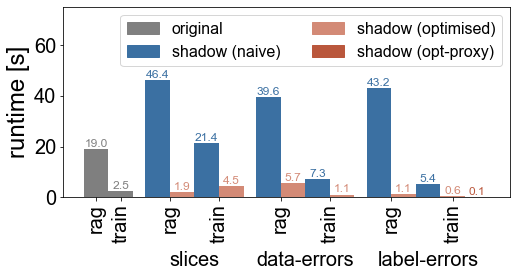

In [11]:
plot_data(all_things_to_plot_exp1, experiment_name="exp1")

In [12]:
def print_speedups_exp1(df):
    scenario_names = list(df["scenario_name"].unique())
    for group_num, scenario_name in enumerate(scenario_names):
        scenario_group = df[df["scenario_name"] == scenario_name]
        variant_names = list(scenario_group["variant_name"].unique()) 
        for variant_num, variant_name in enumerate(variant_names):
            variant_group = scenario_group[scenario_group["variant_name"] == variant_name]
            if scenario_name != "original":
                naive = variant_group[variant_group["opt_name"] == "naive"]["time"].reset_index(drop=True)[0]
                opt = variant_group[variant_group["opt_name"] == "opt"]["time"].reset_index(drop=True)[0]
                print(f"{scenario_name} {variant_name} speedup: {naive/opt}")
                
                if len(variant_group[variant_group["opt_name"] == "proxy_opt"]["time"]) > 0:
                    naive = variant_group[variant_group["opt_name"] == "naive"]["time"].reset_index(drop=True)[0]
                    proxy_opt = variant_group[variant_group["opt_name"] == "proxy_opt"]["time"].reset_index(drop=True)[0]
                    print(f"{scenario_name} {variant_name} proxy_opt speedup: {naive/proxy_opt}")
                    print(f"{scenario_name} {variant_name} proxy_opt runtime: {proxy_opt/1000.}")
    
print_speedups_exp1(all_things_to_plot_exp1)

fairness llm speedup: 24.09364770527253
fairness ml speedup: 4.771036586725613
robustness llm speedup: 6.963030329068772
robustness ml speedup: 6.59904915101532
mislabel llm speedup: 38.03281048056075
mislabel ml speedup: 9.043016955734196
mislabel ml proxy_opt speedup: 55.65217070616177
mislabel ml proxy_opt runtime: 0.09697294235229492


In [13]:
# create the df with the values we want to plot for exp 1:
exp2_only = df_with_all_results[df_with_all_results["experiment_name"] == "exp2"]
median_ml_exp2_naive = df_with_all_results[(df_with_all_results["variant_name"] == "ml") & (df_with_all_results["opt_name"] == "naive")]["original_pipeline_diff"].median()
median_ml_exp2_opt = df_with_all_results[(df_with_all_results["variant_name"] == "ml") & (df_with_all_results["opt_name"] == "opt")]["original_pipeline_diff"].median()
median_llm_exp2_naive = df_with_all_results[(df_with_all_results["variant_name"] == "llm") & (df_with_all_results["opt_name"] == "naive")]["original_pipeline_diff"].median()
median_llm_exp2_opt = df_with_all_results[(df_with_all_results["variant_name"] == "llm") & (df_with_all_results["opt_name"] == "opt")]["original_pipeline_diff"].median()
original_rows_exp2 = pd.DataFrame({"variant_name": ["ml", "ml", "llm", "llm"], "scenario_name": ["original", "original", "original", "original"], "opt_name": ["naive", "opt", "naive", "opt"], "time": [median_ml_exp2_naive, median_ml_exp2_opt, median_llm_exp2_naive, median_llm_exp2_opt]})
relevant_columns_exp2 = exp2_only[["variant_name", "scenario_name", "opt_name", "total_analysis_time_2"]]
relevant_columns_exp2 = relevant_columns_exp2.rename(columns={'total_analysis_time_2': 'time'})
all_things_to_plot_exp2 = pd.concat([original_rows_exp2, relevant_columns_exp2])

all_things_to_plot_exp2['scenario_name_order'] = all_things_to_plot_exp2['scenario_name'].map(scenario_order_map)
all_things_to_plot_exp2['variant_name_order'] = all_things_to_plot_exp2['variant_name'].map(variant_order_map)
all_things_to_plot_exp2['opt_name_order'] = all_things_to_plot_exp2['opt_name'].map(opt_name_order_map)
all_things_to_plot_exp2 = all_things_to_plot_exp2.sort_values(by=['scenario_name_order', 'variant_name_order', 'opt_name_order'])
all_things_to_plot_exp2 = all_things_to_plot_exp2[["variant_name", "scenario_name", "opt_name", "time"]]
all_things_to_plot_exp2

,variant_name,scenario_name,opt_name,time
2,llm,original,naive,21198.688030
3,llm,original,opt,4245.125055
0,ml,original,naive,2527.192831
1,ml,original,opt,484.318018
0,llm,fairness,naive,48059.656858
0,llm,fairness,opt,76.680899
0,ml,fairness,naive,21481.011152
0,ml,fairness,opt,217.399836
0,llm,robustness,naive,48076.053381
0,llm,robustness,opt,987.569094


In [20]:
import matplotlib.patches as mpatches

def plot_data2(df, experiment_name, log_scale=False):
    colors = ['#3b70a2', '#d38a76']
    extra_color = '#ba573c'
    
    # Create a bar plot
    fig, ax = plt.subplots()
    
    scenario_names = list(df["scenario_name"].unique())
    
    # Iterate over each scenario and plot bars for each variant/opt combination
    scenario_positions = {}
    group_offset = 0.
    all_x_ticks = []
    
    for group_num, scenario_name in enumerate(scenario_names):
        df_group = df[df["scenario_name"] == scenario_name]
        x = [pos + group_offset for pos in range(len(df_group))]
        all_x_ticks.extend(x)
        if len(df_group) == 2:
            color_list = ['tab:grey', 'tab:grey']
        elif len(df_group) == 5:
            color_list = colors * 2 + [extra_color]
        else: 
            color_list = colors * 2
        bars = ax.bar(x, df_group['time'] / 1000, color=color_list, width=1.0)
        scenario_positions[scenario_name] = sum(x) / len(x)
        group_offset += len(df_group) + 0.5
        for bar, time in zip(bars, list(df_group['time'] / 1000)):
            height = bar.get_height()
            color = bar.get_facecolor()
            ax.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f'{time:.1f}', ha='center', va='bottom', fontsize=12, color=color)
    
    nicer_opt_names = {
        'original': 'orig',
        'naive': 'naive',
        'opt': 'opt',
        'proxy_opt': 'proxy'
    }
    
    new_model_names = {
        'llm': 'rag',
        'ml': 'train'
        
    }

    
    ax.set_xticks([0.5, 2.5, 5, 7, 9.5, 11.5, 14, 16.5])
    ax.set_xticklabels(['rag', 'train', 'rag', 'train', 'rag', 'train', 'rag', 'train'],
                       fontsize=20, rotation='vertical')
    
    for scenario, position in scenario_positions.items():
            
            new_names = {
                'original': 'original',
                'fairness': 'slices',
                'robustness': 'data-errors',
                'mislabel': 'label-errors'
            }
            
            plt.gcf().text(position, -0.36, new_names[scenario], ha='center', 
                           fontsize=20, transform=ax.get_xaxis_transform())
    
    ax.set_ylabel('runtime [s]', fontsize=24)
    
    if log_scale is True:
        ax.set_yscale('log')
    
    
    #orig_patch = mpatches.Patch(color='grey', label='original')
    naive_patch = mpatches.Patch(color='#3b70a2', label='update (naive)')  
    opt_patch = mpatches.Patch(color='#d38a76', label='update (optimised)')  
    opt_proxy_patch = mpatches.Patch(color=extra_color, label='update (opt-proxy)')
    # plt.legend(handles=[orig_patch, naive_patch, opt_patch, opt_proxy_patch], fontsize=16, ncol=2)
    plt.legend(handles=[naive_patch, opt_patch, opt_proxy_patch], fontsize=16, ncol=2)
    
    plt.gca().tick_params(axis='both', which='major', labelsize=20)
    
    plt.yticks([1, 10, 100])
    plt.ylim((0, 6000))
    plt.gcf().set_size_inches(8, 3.5)
    #plt.subplots_adjust(bottom=0.85)
    #plt.tight_layout()
    
    plt.gcf().savefig(f'{os.getcwd()}/{experiment_name}.pdf', dpi=300, bbox_inches='tight')
    plt.show()

/var/folders/dk/pbhh8rgn191dtpwnbsn_q1mm0000gn/T/ipykernel_37872/205485245.py:81: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim((0, 6000))


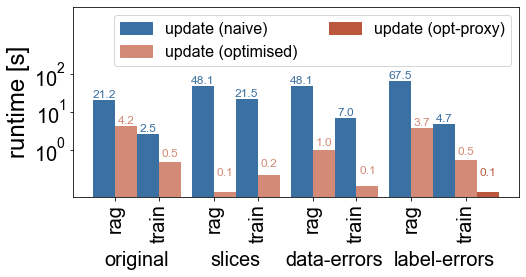

In [21]:
plot_data2(all_things_to_plot_exp2, experiment_name="exp2", log_scale=True)

In [112]:
def print_speedups_exp2(df):
    scenario_names = list(df["scenario_name"].unique())
    for group_num, scenario_name in enumerate(scenario_names):
        scenario_group = df[df["scenario_name"] == scenario_name]
        variant_names = list(scenario_group["variant_name"].unique()) 
        for variant_num, variant_name in enumerate(variant_names):
            variant_group = scenario_group[scenario_group["variant_name"] == variant_name]
            #if scenario_name != "original":
            naive = variant_group[variant_group["opt_name"] == "naive"]["time"].reset_index(drop=True)[0]
            opt = variant_group[variant_group["opt_name"] == "opt"]["time"].reset_index(drop=True)[0]
            print(f"{scenario_name} {variant_name} speedup: {naive/opt}")
            print(f"{scenario_name} {variant_name} opt runtime: {opt/1000.}")
            
            if len(variant_group[variant_group["opt_name"] == "proxy_opt"]["time"]) > 0:
                naive = variant_group[variant_group["opt_name"] == "naive"]["time"].reset_index(drop=True)[0]
                proxy_opt = variant_group[variant_group["opt_name"] == "proxy_opt"]["time"].reset_index(drop=True)[0]
                print(f"{scenario_name} {variant_name} proxy_opt speedup: {naive/proxy_opt}")
                print(f"{scenario_name} {variant_name} proxy_opt runtime: {proxy_opt/1000.}")
    
print_speedups_exp2(all_things_to_plot_exp2)

original llm speedup: 4.993654545868108
original llm opt runtime: 4.24512505531311
original ml speedup: 5.218044213358722
original ml opt runtime: 0.4843180179595947
fairness llm speedup: 626.748743093622
fairness llm opt runtime: 0.07668089866638184
fairness ml speedup: 98.80877367874444
fairness ml opt runtime: 0.21739983558654785
robustness llm speedup: 48.68120487715965
robustness llm opt runtime: 0.9875690937042236
robustness ml speedup: 65.13825474858852
robustness ml opt runtime: 0.10780978202819824
mislabel llm speedup: 18.35926769849265
mislabel llm opt runtime: 3.676424503326416
mislabel ml speedup: 8.660499135253097
mislabel ml opt runtime: 0.5423197746276855
mislabel ml proxy_opt speedup: 60.38444137237652
mislabel ml proxy_opt runtime: 0.07778096199035645
